In [56]:
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [57]:
df = pd.read_csv('Fish.csv')


In [58]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [59]:
df.skew()

Weight     1.104450
Length1    0.588482
Length2    0.539863
Length3    0.391541
Height     0.397186
Width      0.004972
dtype: float64

In [60]:
 df['Log_Weight'] = np.sqrt(df['Weight'])

In [61]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Log_Weight
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,15.556349
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,17.029386
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,18.439089
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,19.052559
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,20.736441
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,3.492850
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,3.660601
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,3.492850
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,4.438468


In [62]:
df.skew()

Weight        1.104450
Length1       0.588482
Length2       0.539863
Length3       0.391541
Height        0.397186
Width         0.004972
Log_Weight    0.227749
dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Species     159 non-null    object 
 1   Weight      159 non-null    float64
 2   Length1     159 non-null    float64
 3   Length2     159 non-null    float64
 4   Length3     159 non-null    float64
 5   Height      159 non-null    float64
 6   Width       159 non-null    float64
 7   Log_Weight  159 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


In [64]:
le = LabelEncoder()

df['Species']= le.fit_transform(df['Species'])

In [65]:
df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [66]:
df.drop(labels = 'Weight', axis = 1 , inplace = True)

In [67]:
df


,Species,Length1,Length2,Length3,Height,Width,Log_Weight
0,0,23.2,25.4,30.0,11.5200,4.0200,15.556349
1,0,24.0,26.3,31.2,12.4800,4.3056,17.029386
2,0,23.9,26.5,31.1,12.3778,4.6961,18.439089
3,0,26.3,29.0,33.5,12.7300,4.4555,19.052559
4,0,26.5,29.0,34.0,12.4440,5.1340,20.736441
...,...,...,...,...,...,...,...
154,5,11.5,12.2,13.4,2.0904,1.3936,3.492850
155,5,11.7,12.4,13.5,2.4300,1.2690,3.660601
156,5,12.1,13.0,13.8,2.2770,1.2558,3.492850
157,5,13.2,14.3,15.2,2.8728,2.0672,4.438468


In [68]:
 
scaler = StandardScaler()
df_standard = scaler.fit_transform(df)


In [69]:
df_standard

array([[-1.33273018, -0.30578858, -0.28230301, ...,  0.59657867,
        -0.23652895, -0.23509474],
       [-1.33273018, -0.22550724, -0.19805366, ...,  0.82126055,
        -0.06657895, -0.07479657],
       [-1.33273018, -0.23554241, -0.17933159, ...,  0.79734129,
         0.16579317,  0.07860943],
       ...,
       [ 1.6103823 , -1.41969211, -1.44307174, ..., -1.56668655,
        -1.88140219, -1.54786328],
       [ 1.6103823 , -1.30930527, -1.32137825, ..., -1.42724336,
        -1.39856804, -1.44495964],
       [ 1.6103823 , -1.24909427, -1.25585098, ..., -1.41334117,
        -1.51043989, -1.44251405]])

In [70]:

df_transform = pd.DataFrame(df_standard, columns= df.columns)

In [71]:
df_transform

,Species,Length1,Length2,Length3,Height,Width,Log_Weight
0,-1.332730,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,-0.235095
1,-1.332730,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,-0.074797
2,-1.332730,-0.235542,-0.179332,-0.010977,0.797341,0.165793,0.078609
3,-1.332730,0.005302,0.054694,0.196390,0.879771,0.022621,0.145368
4,-1.332730,0.025372,0.054694,0.239592,0.812835,0.426371,0.328611
...,...,...,...,...,...,...,...
154,1.610382,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,-1.547863
155,1.610382,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,-1.529608
156,1.610382,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,-1.547863
157,1.610382,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,-1.444960


In [72]:
X = df_transform[['Species', 'Length1', 'Length2',
       'Length3', 'Height','Width']]

y = df_transform['Log_Weight']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [74]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train)

model_results = model.fit()

p_values = model_results.summary2().tables[1]['P>|t|']

p_values = model_results.summary2()

p_values

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.972   
Dependent Variable:     Log_Weight       AIC:                         -97.0994
Date:                   2021-12-27 23:36 BIC:                         -80.0343
No. Observations:       127              Log-Likelihood:              54.550  
Df Model:               6                F-statistic:                 746.7   
Df Residuals:           121              Prob (F-statistic):          4.64e-93
R-squared (uncentered): 0.974            Scale:                       0.026029
----------------------------------------------------------------------------------
                Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
----------------------------------------------------------------------------------
Species         0.0537       0.0239      2.2505     0.0262      0.0065      0.1010
Length1         0.8532       0.6092      1.4004     0.1639     -0.3529      2.0592
Length2         0.2798       0.7347      0.3808     0.7040     -1.1748      1.7343
Length3        -0.6903       0.3266     -2.1134     0.0366     -1.3369     -0.0437
Height          0.4140       0.0679      6.0985     0.0000      0.2796      0.5484
Width           0.2580       0.0572      4.5106     0.0000      0.1448      0.3712
------------------------------------------------------------------------------
Omnibus:                  142.924          Durbin-Watson:             1.780   
Prob(Omnibus):            0.000            Jarque-Bera (JB):          4759.253
Skew:                     -3.804           Prob(JB):                  0.000   
Kurtosis:                 32.009           Condition No.:             138     
==============================================================================

"""

Text(0, 0.5, 'residuals')

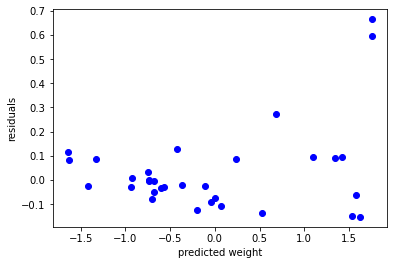

In [76]:
y_pred = lm.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results['residuals'] = results['Actual'] - results['Predicted']
results.head()

#scatter plot
plt.scatter(results['Predicted'], results['residuals'],  color='blue')
plt.xlabel("predicted weight")
plt.ylabel("residuals")


In [77]:

#multi collinearity remove vif greater than 5 or ten
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
X_train1 = sm.add_constant(X_train)

for i in range(X_train1.shape[1]):
    v = vif(X_train1.values, i)
    if i == 0:
        print("VIF for intercept :", v)
    else:
        print("VIF for {} :{}".format(X_train1.columns[i],round(v,4)))

VIF for intercept : 1.0058170501617048
VIF for Species :2.8209
VIF for Length1 :1675.1203
VIF for Length2 :2445.8733
VIF for Length3 :484.5361
VIF for Height :22.4119
VIF for Width :16.097


In [85]:
X = df_transform[['Species', 'Length2', 'Height','Width']]

y = df_transform['Log_Weight']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [87]:
model = sm.OLS(y_train,X_train)

model_results = model.fit()

p_values = model_results.summary2().tables[1]['P>|t|']

p_values = model_results.summary2()

p_values

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.971   
Dependent Variable:     Log_Weight       AIC:                         -93.6931
Date:                   2021-12-27 23:37 BIC:                         -82.3164
No. Observations:       127              Log-Likelihood:              50.847  
Df Model:               4                F-statistic:                 1072.   
Df Residuals:           123              Prob (F-statistic):          1.47e-94
R-squared (uncentered): 0.972            Scale:                       0.027144
-----------------------------------------------------------------------------------
              Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Species       0.0454        0.0218       2.0787      0.0397      0.0022      0.0887
Length2       0.4592        0.0327      14.0485      0.0000      0.3945      0.5239
Height        0.2753        0.0330       8.3518      0.0000      0.2100      0.3405
Width         0.3403        0.0396       8.5962      0.0000      0.2619      0.4186
------------------------------------------------------------------------------
Omnibus:                  134.282          Durbin-Watson:             1.759   
Prob(Omnibus):            0.000            Jarque-Bera (JB):          3884.038
Skew:                     -3.490           Prob(JB):                  0.000   
Kurtosis:                 29.177           Condition No.:             6       
==============================================================================

"""

In [88]:
#Checking Assumption 1 - multicolinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
X_train1 = sm.add_constant(X_train)

for i in range(X_train1.shape[1]):
    v = vif(X_train1.values, i)
    if i == 0:
        print("VIF for intercept :", v)
    else:
        print("VIF for {} :{}".format(X_train1.columns[i],round(v,4)))
X_test

VIF for intercept : 1.0008032523082784
VIF for Species :2.2598
VIF for Length2 :4.6226
VIF for Height :5.057
VIF for Width :7.3713


,Species,Length2,Height,Width
127,-0.155485,1.458850,0.823320,1.891297
42,1.021760,-0.694189,-0.668521,-0.668366
55,2.199005,-0.226137,-0.138225,-0.101093
101,-0.155485,-0.179332,-0.421979,-0.162741
33,-1.332730,1.178019,2.261893,1.386386
124,-0.155485,1.365240,0.693192,1.701710
78,-0.155485,-0.909493,-0.882764,-0.770062
143,0.433137,2.956616,0.147215,1.027385
16,-1.332730,0.429136,1.378378,0.516464
74,-0.155485,-1.255851,-1.204621,-1.181489


Text(0, 0.5, 'residuals')

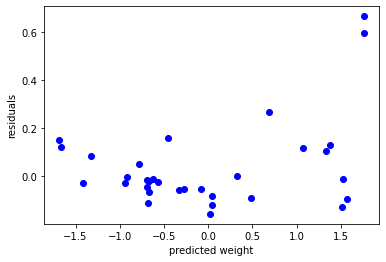

In [89]:
y_pred = lm.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results['residuals'] = results['Actual'] - results['Predicted']
results.head()

#scatter plot
plt.scatter(results['Predicted'], results['residuals'],  color='blue')
plt.xlabel("predicted weight")
plt.ylabel("residuals")


In [91]:
#checking mean close to zero is good
results['residuals'].mean()

0.038912488211475

C:\Users\Khoo Chee Kuang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residuals', ylabel='Density'>

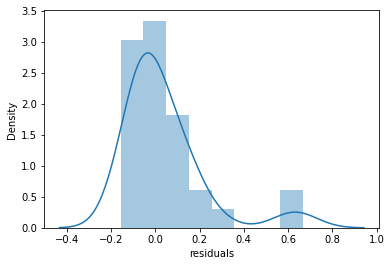

In [92]:
#normality
sns.distplot(results['residuals'])

In [100]:
# #no autocorrelation as there is no pattern

# plt.figure(figsize=(10,5))
# p = sns.lineplot(y_pred,results['residuals'],marker='o',color='blue')
# plt.xlabel('y_pred/predicted values')
# plt.ylabel('Residuals')
# plt.ylim(-2.5,2)
# plt.xlim(0,5)
# p = sns.lineplot([0,5],[0,0],color='red')
# p = plt.title('Residuals vs fitted values plot for autocorrelation check')


Actual:   2
Predict.: 2
Differ.:  0

Actual:   -1
Predict.: -1
Differ.:  0

Actual:   0
Predict.: 0
Differ.:  0

Actual:   0
Predict.: 0
Differ.:  0

Actual:   1
Predict.: 2
Differ.:  0


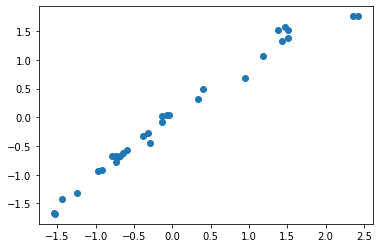

In [96]:


y_actual = y_test.to_numpy()

for i in range(0,5):
    print('\nActual:   ' + str(round(y_actual[i])))
    print('Predict.: ' + str(round(y_pred[i])))
    print('Differ.:  ' + str(round(y_actual[i]-y_pred[i])))
    
#visually plotting    
plt.scatter(y_test,y_pred)